In [ ]:
from google.colab import drive
import numpy as np
from scipy.sparse import dok_matrix
import networkx as nx

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks/Page Rank/
% ls

/content/drive/MyDrive/Colab Notebooks/Page Rank
web-Stanford.txt


In [ ]:
# Now , here I will try to show the sparse matrix looks like and also showing the small prototype of the graph made out of the nodes and the edges ...
# Since , drawing the graph for the original dataset won't be possible as the collab session times out after 1 hr. in my PC , ad also it shows the estimated time to be around 5 hr .

A = np.array([
  [0, 0, 1, 1],
  [1, 0, 1, 0],
  [1, 1, 0, 1],
  [1, 1, 1, 0],
])
A = A/np.sum(A, axis=0)
v = np.array([1, 1, 1, 1])
v = v/np.sum(v)
v = v.reshape((4, 1))
A


array([[0.        , 0.        , 0.33333333, 0.5       ],
       [0.33333333, 0.        , 0.33333333, 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.33333333, 0.        ]])

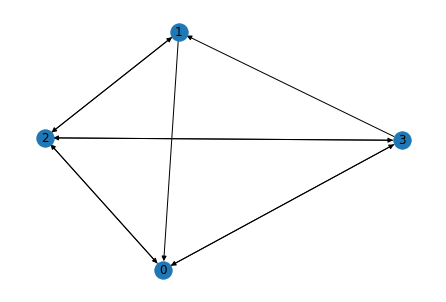

In [ ]:
G = nx.DiGraph()
for ii, i in enumerate(A):
  for jj, j in enumerate(i):
    if j>0:
      G.add_edge(ii, jj, weight=j)
nx.draw(G, with_labels=True)   


In [ ]:
print("Nodes are : " ,list(G.nodes))
print("Edges are : " ,list(G.edges))

Nodes are :  [0, 2, 3, 1]
Edges are :  [(0, 2), (0, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2), (1, 0), (1, 2)]


In [ ]:
# Now the actual code for the page rank starts ...... 

In [ ]:
# So , now from the web Standford.txt file , we perform the page ranking 
G = nx.DiGraph()
dims = 281903 # because these are these many of the nodes which hase been printed below..
sparse_matrix = dok_matrix((dims, dims), dtype=np.float32)
D = np.zeros(dims)

with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, as these details are not required for the page rank algorithm ..
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    G.add_edge(start_node, end_node)
    D[start_node-1] = D[start_node-1] + 1

with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, can be done by putting condition of '#'and also as these details are not required for the page rank algorithm
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    sparse_matrix[start_node-1, end_node-1] = 1/D[start_node-1]
sparse_matrix = sparse_matrix.tocsr()

print(sparse_matrix)

  (0, 6547)	0.5
  (0, 15408)	0.5
  (1, 17793)	0.032258064
  (1, 25201)	0.032258064
  (1, 53624)	0.032258064
  (1, 54581)	0.032258064
  (1, 64929)	0.032258064
  (1, 73763)	0.032258064
  (1, 84476)	0.032258064
  (1, 98627)	0.032258064
  (1, 100192)	0.032258064
  (1, 102354)	0.032258064
  (1, 105317)	0.032258064
  (1, 105729)	0.032258064
  (1, 115925)	0.032258064
  (1, 140863)	0.032258064
  (1, 163549)	0.032258064
  (1, 164598)	0.032258064
  (1, 175798)	0.032258064
  (1, 178641)	0.032258064
  (1, 181713)	0.032258064
  (1, 190452)	0.032258064
  (1, 204188)	0.032258064
  (1, 204603)	0.032258064
  (1, 210869)	0.032258064
  :	:
  (281897, 166892)	0.14285715
  (281897, 191218)	0.14285715
  (281897, 231578)	0.14285715
  (281897, 266495)	0.14285715
  (281897, 275194)	0.14285715
  (281898, 30563)	0.33333334
  (281898, 266497)	0.33333334
  (281898, 275193)	0.33333334
  (281899, 186749)	0.5
  (281899, 225871)	0.5
  (281900, 203841)	1.0
  (281901, 68136)	0.14285715
  (281901, 119657)	0.14285715
  (2

In [ ]:
print("Total Nodes : " ,len(list(G.nodes)))
print("Total Edges : " ,len(list(G.edges)))
# nx.draw(G, with_labels=True)   

Total Nodes :  281903
Total Edges :  2312497


In [ ]:
def get_ranks(H, v, N, dangling_factor=0.85):
  iters = 0
  while True:
    new_v = dangling_factor * (H @ v) + (1-dangling_factor)/N
    
    iters+=1
    if np.allclose(new_v, v):
      break
    v = new_v
  print(iters)
  print(v)
  return v
v = np.ones(dims)/dims
z = get_ranks(sparce_matrix, v, dims)

# Over here we have taken the default value of the Damping factor to be 0.85 and then this function is going to return the rank of the pages or documents.
# We are returning the the iteration taken and also the the vector V finally .

37
[3.54731947e-06 3.54715507e-06 3.48797011e-06 ... 3.54665501e-06
 3.54682833e-06 3.53805941e-06]


In [ ]:
# checking if the sum of the probabilities is close to 1 or not ..
np.sum(z) 

0.997621010253663